<a href="https://colab.research.google.com/github/allanspadini/livro-val-allan/blob/main/capitulo2/capitulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Capítulo 2 - Prophet**

In [ ]:
from prophet import Prophet

In [ ]:
df = pd.DataFrame()

In [ ]:
df['ds'] =dados_br['Data']
df['y'] = dados_br['Temperatura']

In [ ]:
df

,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124
...,...,...
2159,2013-04-01,25.464
2160,2013-05-01,24.906
2161,2013-06-01,24.788
2162,2013-07-01,24.202


In [ ]:
modelo = Prophet()

In [ ]:
modelo.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzdgiroyl/35v8ujni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzdgiroyl/djc67jlz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=455', 'data', 'file=/tmp/tmpzdgiroyl/35v8ujni.json', 'init=/tmp/tmpzdgiroyl/djc67jlz.json', 'output', 'file=/tmp/tmpwcjrabux/prophet_model-20220918163639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:36:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
dataFramefuturo = modelo.make_future_dataframe(periods=0)

In [ ]:
previsao = modelo.predict(dataFramefuturo)

In [ ]:
previsao.head(3).T

,0,1,2
ds,1832-01-01 00:00:00,1832-02-01 00:00:00,1832-03-01 00:00:00
trend,23.960866,23.961948,23.96296
yhat_lower,23.970135,23.95873,23.736023
yhat_upper,25.093396,25.093083,24.880704
trend_lower,23.960866,23.961948,23.96296
trend_upper,23.960866,23.961948,23.96296
additive_terms,0.599602,0.581401,0.349891
additive_terms_lower,0.599602,0.581401,0.349891
additive_terms_upper,0.599602,0.581401,0.349891
yearly,0.599602,0.581401,0.349891


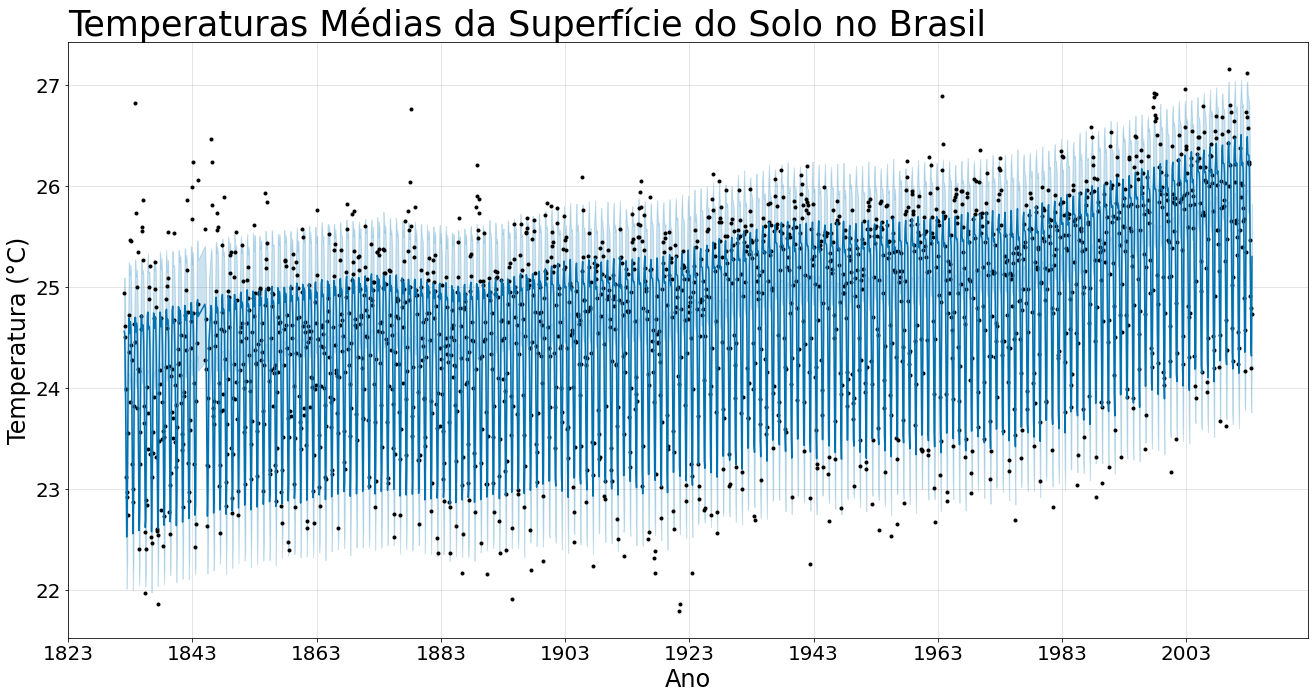

In [ ]:
modelo.plot(previsao, figsize=(18,9));
plt.title('Temperaturas Médias da Superfície do Solo no Brasil ', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

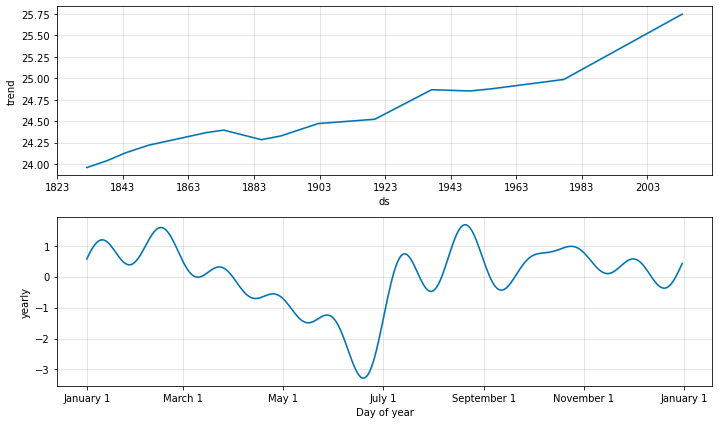

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

In [ ]:
modelo = Prophet()
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=120, freq='M') 
previsao = modelo.predict(dataFramefuturo)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzdgiroyl/8ts0s4mm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzdgiroyl/mxk50330.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97053', 'data', 'file=/tmp/tmpzdgiroyl/8ts0s4mm.json', 'init=/tmp/tmpzdgiroyl/mxk50330.json', 'output', 'file=/tmp/tmpfxv6u88g/prophet_model-20220918163908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:39:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:39:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


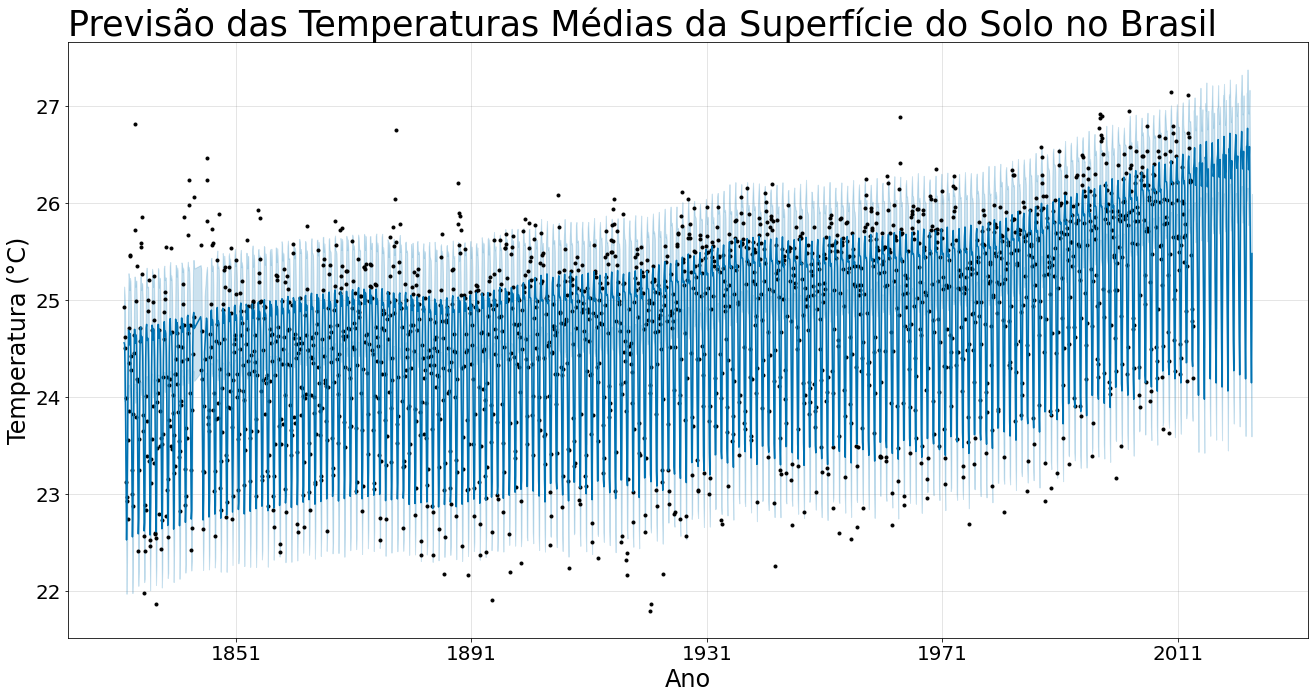

In [ ]:
modelo.plot(previsao, figsize=(18,9));
plt.title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil ', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

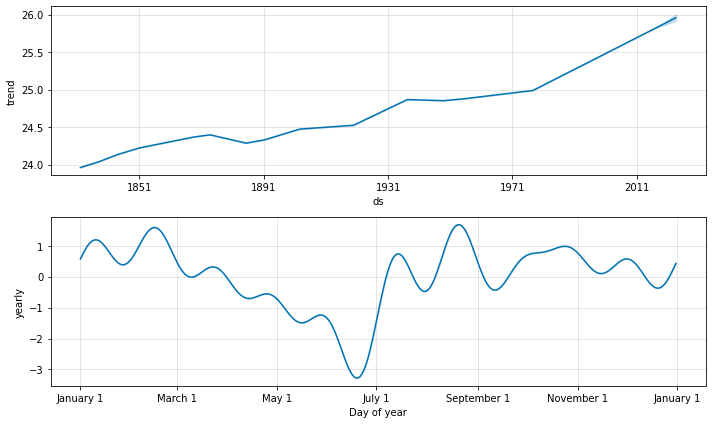

In [ ]:
modelo.plot_components(previsao,figsize=(10,6));